In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cartopy import crs, feature
import matplotlib.colors as colors
import matplotlib.colorbar as colorbar
import matplotlib.cm as mcm
import pandas as pd
import glob
import os
os.environ["PROJ_LIB"] = os.path.join(os.environ["CONDA_PREFIX"], "share", "proj")
from pykrige.ok import OrdinaryKriging
from pykrige.kriging_tools import write_asc_grid
import pykrige.kriging_tools as kt
import gstools as gs


%matplotlib inline

In [2]:
landcolour = 'lightgrey'
plt.rcParams['font.size'] = 15

In [3]:
SalishSeaDF=pd.read_excel('/ocean/ksuchy/MOAD/analysis-karyn/notebooks/SalishSeaBiomassDF.xlsx',engine='openpyxl')

In [4]:
SalishSeaDF

,Unnamed: 0,Unnamed: 0.1,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,...,Total,Copepods,Amphipods,Euphausiids,MainGroups,Gastropods,Chaetognaths,Crabs,Larvaceans,Month
0,0,0,010218ELIV1151,Bellingham Bay,48.63795,-122.5694,2018-01-02 00:00:00,110.0,0,2018-01-02 19:51:00,...,12.189953,3.065202,5.438239,0.067185,12.189953,0.000000,0.507425,1.223176,1.888727,1
1,1,1,010818SKETV1058,South Sound,47.15243,-122.6586,2018-01-08 00:00:00,122.0,0,2018-01-08 18:58:00,...,35.059787,1.482905,7.505748,0.000000,35.045540,0.014246,0.000000,4.870446,21.186442,1
2,2,2,011119ELIV1052,Bellingham Bay,48.63795,-122.5694,2019-01-11 00:00:00,114.0,0,2019-01-11 18:52:00,...,8.506914,3.067335,4.452295,0.000000,7.856868,0.650047,0.337238,0.000000,0.000000,1
3,3,3,011315CAMV1330,Whidbey Basin,48.05901,-122.3873,2015-01-13 00:00:00,170.0,0,2015-01-13 21:30:00,...,15.115082,7.412901,6.376149,0.000000,15.065975,0.049107,0.004042,1.272882,0.000000,1
4,4,4,011315MUKV1415,Whidbey Basin,47.97166,-122.3222,2015-01-13 00:00:00,190.0,0,2015-01-13 22:15:00,...,26.622828,5.429623,15.713070,0.000000,26.572865,0.049964,0.636865,2.440229,2.353078,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,2500,1341,UBC9999099001401,Juan de Fuca,48.30000,-124.0000,8/27/2018,104.0,0,2018-08-28 01:45:00,...,20.249172,4.971285,0.816575,2.963128,16.010473,0.000000,14.673260,0.702630,0.145620,8
2501,2501,1342,UBC9999099001601,Central Strait of Georgia,49.22800,-123.4700,8/30/2016,309.0,0,2016-08-30 19:00:00,...,41.147779,5.849289,22.385763,1.031931,32.627093,0.119610,8.126650,0.031068,0.044325,8
2502,2502,1343,UBC9999099001801,Central Strait of Georgia,49.25000,-123.6670,12/4/2017,375.0,0,2017-12-04 20:00:00,...,7.421247,3.729816,0.986004,0.270400,5.082507,0.689860,0.228260,0.056574,0.000000,12
2503,2503,1344,UBC9999099001901,Central Strait of Georgia,49.25000,-123.6670,1/15/2018,375.0,0,2018-01-15 20:00:00,...,8.693456,4.139019,2.241436,0.219060,6.753492,0.073910,0.380430,0.011412,0.007043,1


In [5]:
TotalZoop = SalishSeaDF.Total
TotalZoop

0       12.189953
1       35.059787
2        8.506914
3       15.115082
4       26.622828
          ...    
2500    20.249172
2501    41.147779
2502     7.421247
2503     8.693456
2504    12.582157
Name: Total, Length: 2505, dtype: float64

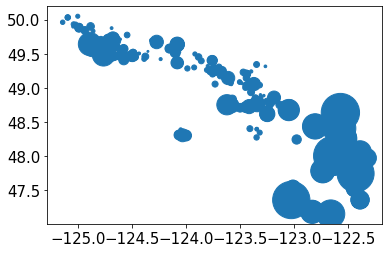

In [6]:
Lon=SalishSeaDF['Lon']
Lat=SalishSeaDF['Lat']
Total=SalishSeaDF['Total']

plt.scatter(x=Lon,y=Lat,s=Total)
plt.show()

In [7]:
SalishSea2014=SalishSeaDF.loc[SalishSeaDF.Year==2014]
SalishSea2015=SalishSeaDF.loc[SalishSeaDF.Year==2015]
SalishSea2016=SalishSeaDF.loc[SalishSeaDF.Year==2016]
SalishSea2017=SalishSeaDF.loc[SalishSeaDF.Year==2017]
SalishSea2018=SalishSeaDF.loc[SalishSeaDF.Year==2018]
SalishSea2019=SalishSeaDF.loc[SalishSeaDF.Year==2019]

In [8]:
SalishSea2014

,Unnamed: 0,Unnamed: 0.1,Key,region_name,Lat,Lon,Date,Z_lower,Z_upper,dtUTC,...,Total,Copepods,Amphipods,Euphausiids,MainGroups,Gastropods,Chaetognaths,Crabs,Larvaceans,Month
159,159,159,032514DANAV1035,South Sound,47.18327,-122.8307,2014-03-25 00:00:00,40.0,0,2014-03-25 17:35:00,...,24.274837,0.550670,0.000000,0.000000,24.270069,0.004769,0.002311,0.484022,23.233066,3
176,176,176,040114sketv1001,South Sound,47.15243,-122.6586,2014-04-01 00:00:00,122.0,0,2014-04-01 17:01:00,...,53.725087,1.509137,11.273210,0.000000,53.705929,0.019157,0.071500,9.414809,31.437274,4
189,189,189,040414ADIV1300,Admiralty Inlet,48.00273,-122.6360,2014-04-04 00:00:00,100.0,0,2014-04-04 20:00:00,...,249.070342,5.818839,12.992763,0.000000,248.988538,0.081804,0.139070,159.043947,70.993919,4
211,211,211,040914SKETV1222,South Sound,47.15243,-122.6586,2014-04-09 00:00:00,123.0,0,2014-04-09 19:22:00,...,68.695958,1.202860,2.442529,0.178571,68.682616,0.013342,0.035714,14.193491,50.629451,4
212,212,212,040914danav1138,South Sound,47.18327,-122.8307,2014-04-09 00:00:00,49.0,0,2014-04-09 18:38:00,...,159.400322,2.143087,0.000000,0.000000,159.290348,0.109974,0.041234,16.113439,140.992588,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,2171,1012,PBS2014028009001,Northern Strait of Georgia,49.59900,-124.6550,6/23/2014,150.0,0,2014-06-23 07:00:00,...,65.052958,33.128473,17.247294,11.638751,62.401257,0.000000,1.807570,0.195858,0.026069,6
2172,2172,1013,PBS2014028009301,Northern Strait of Georgia,49.57000,-124.5810,6/23/2014,165.0,0,2014-06-23 20:29:00,...,31.269510,5.177817,7.154190,14.551673,29.616066,0.000000,5.939580,0.268997,0.022288,6
2173,2173,1014,PBS2014028009601,Northern Strait of Georgia,49.50900,-124.4930,6/23/2014,160.0,0,2014-06-23 21:41:00,...,58.729806,13.890109,20.816955,15.493356,56.381364,0.308300,3.412190,5.086314,0.016321,6
2174,2174,1015,PBS2014028009901,Northern Strait of Georgia,49.45200,-124.4730,6/23/2014,325.0,0,2014-06-23 23:09:00,...,43.907666,26.137782,7.557332,0.480604,34.312297,8.202290,1.143900,0.206235,0.012213,6


In [10]:
Mar2014=(SalishSeaDF.Year == 2014) & (SalishSeaDF.Month == 3)
Mar2015=(SalishSeaDF.Year == 2015) & (SalishSeaDF.Month == 3)
Mar2016=(SalishSeaDF.Year == 2016) & (SalishSeaDF.Month == 3)
Mar2017=(SalishSeaDF.Year == 2017) & (SalishSeaDF.Month == 3)
Mar2018=(SalishSeaDF.Year == 2018) & (SalishSeaDF.Month == 3)
Mar2019=(SalishSeaDF.Year == 2019) & (SalishSeaDF.Month == 3)

In [11]:
May2014=(SalishSeaDF.Year == 2014) & (SalishSeaDF.Month == 5)
May2015=(SalishSeaDF.Year == 2015) & (SalishSeaDF.Month == 5)
May2016=(SalishSeaDF.Year == 2016) & (SalishSeaDF.Month == 5)
May2017=(SalishSeaDF.Year == 2017) & (SalishSeaDF.Month == 5)
May2018=(SalishSeaDF.Year == 2018) & (SalishSeaDF.Month == 5)
May2019=(SalishSeaDF.Year == 2019) & (SalishSeaDF.Month == 5)

In [12]:
Mar2014

0       False
1       False
2       False
3       False
4       False
        ...  
2500    False
2501    False
2502    False
2503    False
2504    False
Length: 2505, dtype: bool

In [13]:
# define log transform function with slight shift to accommodate zero values
def logt(x):
  return np.log10(x+.001)

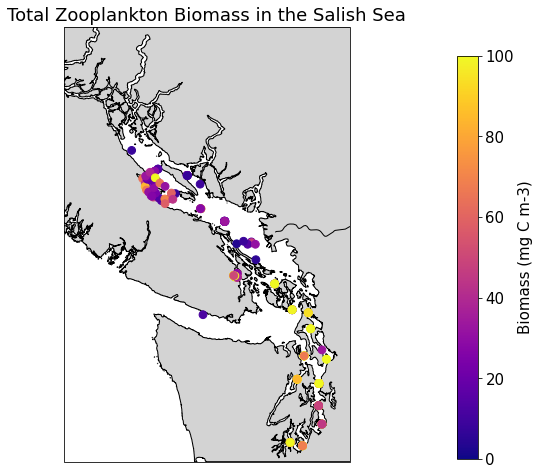

In [18]:
Lon=SalishSea2014['Lon']
Lat=SalishSea2014['Lat']
#Total=logt(SalishSeaDF['Total'])
Total=SalishSea2014['Total']

vmax=100
normalize = colors.Normalize(vmin=0, vmax=vmax)
fig = plt.figure(figsize=(10, 8))
xlim, ylim = [-126., -122.], [47., 51.]
ax = plt.subplot(projection=crs.Mercator(np.mean(xlim), *ylim))
ax.set_extent(xlim + ylim)
#ax.set_extent([-126., -122., 47., 51.])
ax.add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax.add_feature(feature.RIVERS, edgecolor='k')
st = 2
ax.scatter(Lon,Lat,c=Total,marker='o', s=60, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax.gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = colorbar.ColorbarBase(cax, cmap=mcm.plasma, norm=normalize) 
cb.set_label('Biomass (mg C m-3)')
ax.set_title("Total Zooplankton Biomass in the Salish Sea");



In [22]:
Total2014=SalishSea2014['Total']
Lon2014=SalishSea2014['Lon']
Lat2014=SalishSea2014['Lat']

Total2015=SalishSea2015['Total']
Lon2015=SalishSea2015['Lon']
Lat2015=SalishSea2015['Lat']

Total2016=SalishSea2016['Total']
Lon2016=SalishSea2016['Lon']
Lat2016=SalishSea2016['Lat']

Total2017=SalishSea2017['Total']
Lon2017=SalishSea2017['Lon']
Lat2017=SalishSea2017['Lat']

Total2018=SalishSea2018['Total']
Lon2018=SalishSea2018['Lon']
Lat2018=SalishSea2018['Lat']

Total2019=SalishSea2019['Total']
Lon2019=SalishSea2019['Lon']
Lat2019=SalishSea2019['Lat']

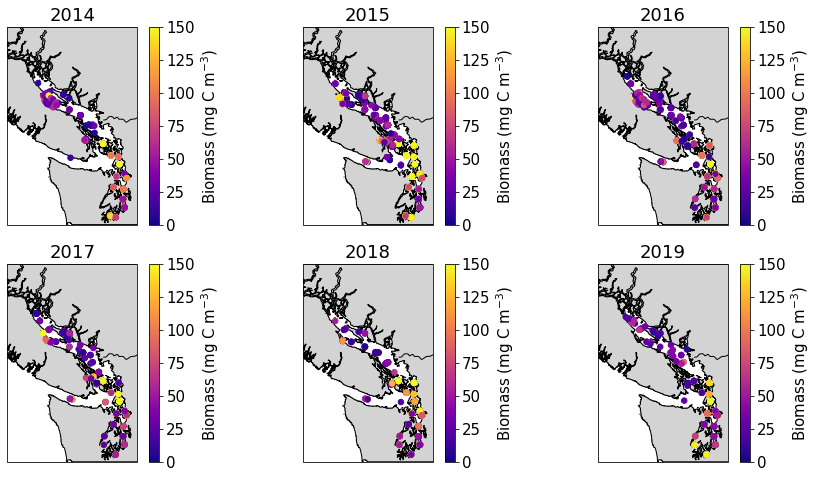

In [23]:



fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})


vmax=150
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]


ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(Lon2014,Lat2014,c=Total2014,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(Lon2015,Lat2015,c=Total2015,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(Lon2016,Lat2016,c=Total2016,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(Lon2017,Lat2017,c=Total2017,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(Lon2018,Lat2018,c=Total2018,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(Lon2019,Lat2019,c=Total2019,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,2].set_title("2019");


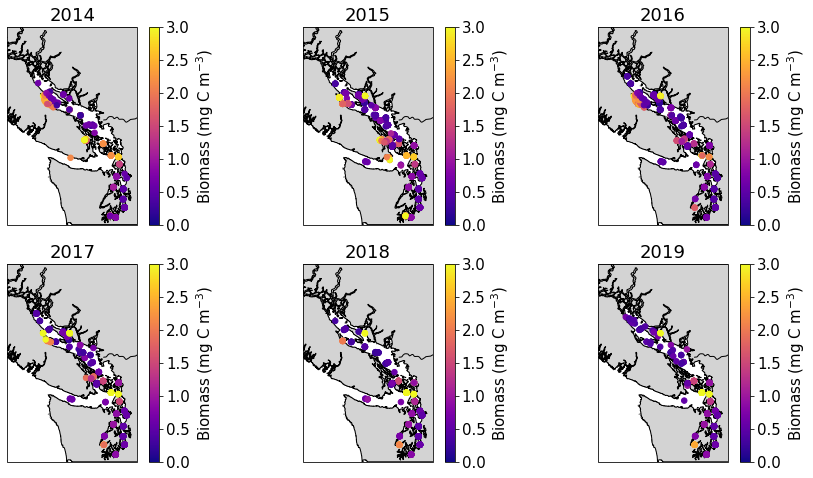

In [24]:
Norm2014=SalishSea2014['Total'].mean()/SalishSea2014['Z_lower']
Norm2015=SalishSea2015['Total'].mean()/SalishSea2015['Z_lower']
Norm2016=SalishSea2016['Total'].mean()/SalishSea2016['Z_lower']
Norm2017=SalishSea2017['Total'].mean()/SalishSea2017['Z_lower']
Norm2018=SalishSea2018['Total'].mean()/SalishSea2018['Z_lower']
Norm2019=SalishSea2019['Total'].mean()/SalishSea2019['Z_lower']



fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})



vmax=3
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(Lon2014,Lat2014,c=Norm2014,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(Lon2015,Lat2015,c=Norm2015,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(Lon2016,Lat2016,c=Norm2016,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(Lon2017,Lat2017,c=Norm2017,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(Lon2018,Lat2018,c=Norm2018,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(Lon2019,Lat2019,c=Norm2019,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,2].set_title("2019");



In [25]:
SalishSea_Mar2014 = SalishSeaDF.loc[Mar2014]
SalishSea_Mar2015 = SalishSeaDF.loc[Mar2015]
SalishSea_Mar2016 = SalishSeaDF.loc[Mar2016]
SalishSea_Mar2017 = SalishSeaDF.loc[Mar2017]
SalishSea_Mar2018 = SalishSeaDF.loc[Mar2018]
SalishSea_Mar2019 = SalishSeaDF.loc[Mar2019]


In [26]:
SalishSea_May2014 = SalishSeaDF.loc[May2014]
SalishSea_May2015 = SalishSeaDF.loc[May2015]
SalishSea_May2016 = SalishSeaDF.loc[May2016]
SalishSea_May2017 = SalishSeaDF.loc[May2017]
SalishSea_May2018 = SalishSeaDF.loc[May2018]
SalishSea_May2019 = SalishSeaDF.loc[May2019]

In [39]:
MarTotal2014=SalishSea_Mar2014['Total']
MarTotal2015=SalishSea_Mar2015['Total']
MarTotal2016=SalishSea_Mar2016['Total']
MarTotal2017=SalishSea_Mar2017['Total']
MarTotal2018=SalishSea_Mar2018['Total']
MarTotal2019=SalishSea_Mar2019['Total']

MarLon2014=SalishSea_Mar2014['Lon']
MarLon2015=SalishSea_Mar2015['Lon']
MarLon2016=SalishSea_Mar2016['Lon']
MarLon2017=SalishSea_Mar2017['Lon']
MarLon2018=SalishSea_Mar2018['Lon']
MarLon2019=SalishSea_Mar2019['Lon']

MarLat2014=SalishSea_Mar2014['Lat']
MarLat2015=SalishSea_Mar2015['Lat']
MarLat2016=SalishSea_Mar2016['Lat']
MarLat2017=SalishSea_Mar2017['Lat']
MarLat2018=SalishSea_Mar2018['Lat']
MarLat2019=SalishSea_Mar2019['Lat']

MarNorm2014=SalishSea_Mar2014['Total'].mean()/SalishSea_Mar2014['Z_lower']
MarNorm2015=SalishSea_Mar2015['Total'].mean()/SalishSea_Mar2015['Z_lower']
MarNorm2016=SalishSea_Mar2016['Total'].mean()/SalishSea_Mar2016['Z_lower']
MarNorm2017=SalishSea_Mar2017['Total'].mean()/SalishSea_Mar2017['Z_lower']
MarNorm2018=SalishSea_Mar2018['Total'].mean()/SalishSea_Mar2018['Z_lower']
MarNorm2019=SalishSea_Mar2019['Total'].mean()/SalishSea_Mar2019['Z_lower']

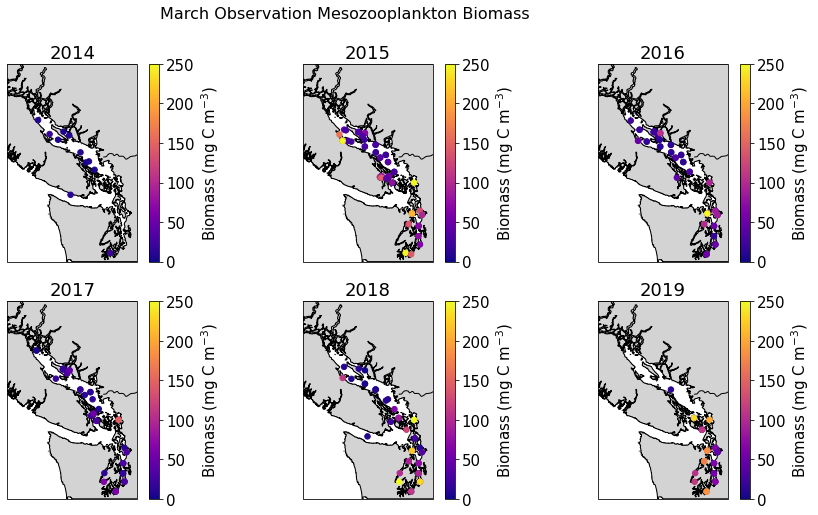

In [55]:

fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})

fig.suptitle('March Observation Mesozooplankton Biomass', fontsize=16)

vmax=250
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(MarLon2014,MarLat2014,c=MarTotal2014,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(MarLon2015,MarLat2015,c=MarTotal2015,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(MarLon2016,MarLat2016,c=MarTotal2016,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(MarLon2017,MarLat2017,c=MarTotal2017,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(MarLon2018,MarLat2018,c=MarTotal2018,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(MarLon2019,MarLat2019,c=MarTotal2019,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,2].set_title("2019");

In [41]:
MayTotal2014=SalishSea_May2014['Total']
MayTotal2015=SalishSea_May2015['Total']
MayTotal2016=SalishSea_May2016['Total']
MayTotal2017=SalishSea_May2017['Total']
MayTotal2018=SalishSea_May2018['Total']
MayTotal2019=SalishSea_May2019['Total']

MayLon2014=SalishSea_May2014['Lon']
MayLon2015=SalishSea_May2015['Lon']
MayLon2016=SalishSea_May2016['Lon']
MayLon2017=SalishSea_May2017['Lon']
MayLon2018=SalishSea_May2018['Lon']
MayLon2019=SalishSea_May2019['Lon']

MayLat2014=SalishSea_May2014['Lat']
MayLat2015=SalishSea_May2015['Lat']
MayLat2016=SalishSea_May2016['Lat']
MayLat2017=SalishSea_May2017['Lat']
MayLat2018=SalishSea_May2018['Lat']
MayLat2019=SalishSea_May2019['Lat']

MayNorm2014=SalishSea_May2014['Total'].mean()/SalishSea_May2014['Z_lower']
MayNorm2015=SalishSea_May2015['Total'].mean()/SalishSea_May2015['Z_lower']
MayNorm2016=SalishSea_May2016['Total'].mean()/SalishSea_May2016['Z_lower']
MayNorm2017=SalishSea_May2017['Total'].mean()/SalishSea_May2017['Z_lower']
MayNorm2018=SalishSea_May2018['Total'].mean()/SalishSea_May2018['Z_lower']
MayNorm2019=SalishSea_May2019['Total'].mean()/SalishSea_May2019['Z_lower']

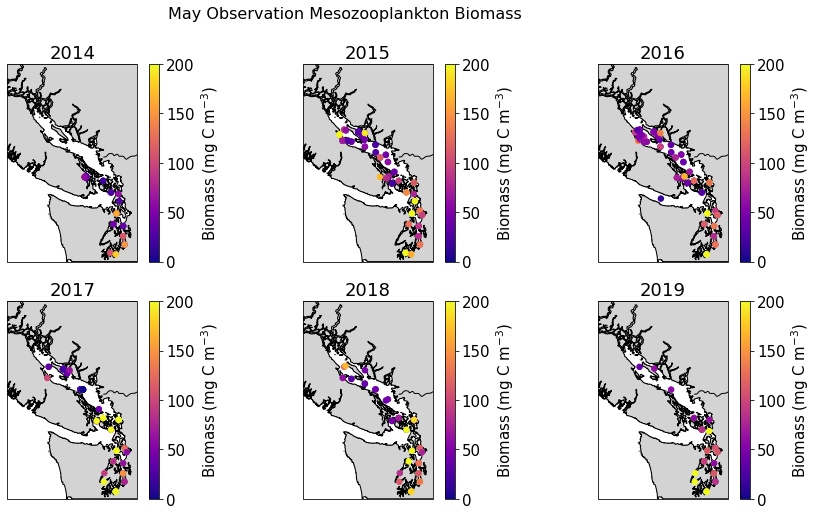

In [54]:

fig,ax=plt.subplots(2,3,figsize=(15,8),subplot_kw={'projection':crs.Mercator(np.mean(xlim), *ylim)})
fig.suptitle('May Observation Mesozooplankton Biomass', fontsize=16)


vmax=200
normalize = colors.Normalize(vmin=0, vmax=vmax)
xlim, ylim = [-126., -122.], [47., 51.]

ax[0,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,0].scatter(MayLon2014,MayLat2014,c=MayTotal2014,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,0].set_title("2014");

ax[0,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,1].scatter(MayLon2015,MayLat2015,c=MayTotal2015,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,1].set_title("2015");

ax[0,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[0,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[0,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[0,2].scatter(MayLon2016,MayLat2016,c=MayTotal2016,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[0,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[0,2].set_title("2016");

ax[1,0].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,0].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,0].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,0].scatter(MayLon2017,MayLat2017,c=MayTotal2017,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,0]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,0].set_title("2017");

ax[1,1].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,1].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,1].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,1].scatter(MayLon2018,MayLat2018,c=MayTotal2018,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[1,1].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,1]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,1].set_title("2018");


ax[1,2].set_extent(xlim + ylim)
#ax[0,0].set_extent([-126., -122., 47., 51.])
ax[1,2].add_feature(feature.GSHHSFeature('full', edgecolor='k', facecolor=landcolour))
ax[1,2].add_feature(feature.RIVERS, edgecolor='k')
st = 2
m=ax[1,2].scatter(MayLon2019,MayLat2019,c=MayTotal2019,marker='o', s=30, transform=crs.PlateCarree(), norm=normalize,cmap=mcm.plasma,zorder=2)
#gl = ax[0,0].gridlines(linestyle=':', color='k', draw_labels=True)
#gl.top_labels, gl.right_labels = False, False
#cax = fig.add_axes([0.86, 0.13, 0.03, 0.7])
cb = fig.colorbar(m,ax=ax[1,2]) 
cb.set_label('Biomass (mg C m$^{-3}$)')
ax[1,2].set_title("2019");